# Assignment: MatPlotLib Dashboard

**Tamara Baez**

**CIS 9655 Data Visualization**

*Data Source 1:* https://furmancenter.org/neighborhoods/view/parkchester-soundview 
    *Description:* This dataset included demographics, housing information and crime rates within the five boroughs of NYC. Some information was limited to only year 2017. The demographics included information on the poverty rate of each of the boroughs. The median rent cost per year for each neighborhood district within the five boroughs was given. The crime rates for both property (burgarly, theft) and violent (assault, murder) were provided. 
    
*Data Source 2:* https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page
*Description:* In order to merge this data properly, the only dataset used was for year 2017. The dataset included the square footage of properties, sale price for 1-family homes and year of house built.  

## 3 Minute Story 
Living in NYC my whole life, I noticed how difficult it was for people to prosper within the five boroughs. Most people left to other states or upstate NY, not because they didn't like living in NYC, but due to the expense. This is evident in the median rent costs within the five boroughs. Approximately 40% of median rent costs is over $1,500, which will make it difficult for people to save and buy their own home. Homes that are over-price compared to the total square footage and mostly starting at a sales price of 400k-600k (Queens data). There is over 10% poverty rates in all the boroughs, which is a leading factor as to why the crime rates are so high. Why has nothing changed? Instead, NYC is being gentrified and becoming more of an expense to NYC residents. I recommend providing additional support for NYC residents in order to overcome these challenges. Instead of *almost* forcing residents to move out, there should be encouragement to invest within their home, NYC. This cannot be done with the financial burden imposed in NYC. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
poverty = pd.read_csv("poverty_rate_data.csv")
rent = pd.read_csv("median_rent_data.csv")
crime = pd.read_csv("crime_rate_data.csv")

In [3]:
poverty.head()

,Geography,Name,Level,Poverty_Rate_2017
0,BX,The Bronx,Boro,28.00%
1,BK,Brooklyn,Boro,19.80%
2,MN,Manhattan,Boro,16.20%
3,QN,Queens,Boro,12.10%
4,SI,Staten Island,Boro,11.80%


In [192]:
rent.head(7)

,Geography,Name,Level,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,NYC,New York City,City,"$1,190","$1,210","$1,230","$1,280","$1,300","$1,310","$1,320","$1,330","$1,360","$1,410","$1,430",1430,"$1,470"
1,BX,The Bronx,Boro,"$1,040","$1,050","$1,070","$1,090","$1,120","$1,140","$1,120","$1,140","$1,150","$1,180","$1,190",1210,"$1,210"
2,BK,Brooklyn,Boro,"$1,130","$1,160","$1,170","$1,200","$1,250","$1,250","$1,270","$1,290","$1,330","$1,370","$1,420",1420,"$1,460"
3,MN,Manhattan,Boro,"$1,360","$1,390","$1,410","$1,540","$1,510","$1,580","$1,600","$1,610","$1,640","$1,720","$1,750",1660,"$1,770"
4,QN,Queens,Boro,"$1,340","$1,350","$1,350","$1,400","$1,430","$1,430","$1,440","$1,440","$1,480","$1,530","$1,530",1550,"$1,610"
5,SI,Staten Island,Boro,"$1,250","$1,320","$1,280","$1,300","$1,320","$1,250","$1,230","$1,260","$1,230","$1,290","$1,310",1330,"$1,310"
6,BX 01,Mott Haven/Melrose,Community District,$770,$760,$790,$830,$810,$820,$820,$900,$880,$900,"$1,000",1000,$940


In [5]:
crime.head()

,Geography,Name,Level,property_crime_rate,violent_crime_rate
0,BX,The Bronx,Boro,6.7,7.0
1,BK,Brooklyn,Boro,6.4,4.2
2,MN,Manhattan,Boro,12.1,4.6
3,QN,Queens,Boro,5.1,3.1
4,SI,Staten Island,Boro,3.0,1.9


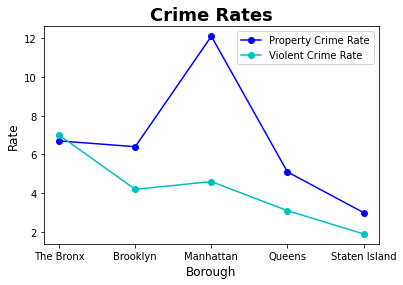

<Figure size 432x288 with 0 Axes>

In [317]:
#Line Graph 
line1 = plt.plot(crime['Name'], crime['property_crime_rate'], color ='b', marker = 'o')
line2 = plt.plot(crime['Name'], crime['violent_crime_rate'], color = 'c', marker = 'o')

#add a legend 
plt.legend(['Property Crime Rate', 'Violent Crime Rate'], loc = 0)

ax = plt.gca()
ax.set_title("Crime Rates", fontdict={'fontweight':'bold', 'fontsize': 18})

plt.xlabel("Borough", fontdict={'fontsize':'12'})
plt.ylabel("Rate", fontdict={'fontsize':'12'})

plt.show()


In [22]:
#Pie Chart convert median rent 2017
rent['2017'] = [x.strip('$') if type(x)==str else x for x in rent['2017']]
rent['2017'] = rent['2017'].str.replace(',', '')

rent['2017']


0     1430
1     1210
2     1420
3     1660
4     1550
      ... 
60    1660
61    1220
62    1240
63    1460
64    1440
Name: 2017, Length: 65, dtype: object

In [23]:
rent['2017'] = rent['2017'].astype(int)

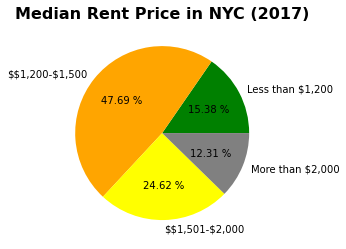

In [380]:
#Pie Chart categories

less_than_1200 = rent.loc[rent['2017'] <1200].count()[0]
range_1200_to_1500 = rent.loc[(rent['2017'] >=1200) & (rent['2017'] <=1500)].count()[0]
range_1501_to_2000 = rent.loc[(rent['2017'] >1500) & (rent['2017'] <=2000)].count()[0]
more_than_2000 =rent.loc[rent['2017']> 2000].count()[0]

colors = ['green', 'orange', 'yellow', 'grey']

labels = ['Less than $1,200', '$$1,200-$1,500', '$$1,501-$2,000', 'More than $2,000']

rent_price = [less_than_1200, range_1200_to_1500, range_1501_to_2000, more_than_2000]
plt.pie(rent_price, labels=labels, autopct = '%.2f %%', colors = colors)
plt.title('Median Rent Price in NYC (2017)', fontdict={'fontweight':'bold', 'fontsize': 16})

plt.show()

In [28]:
poverty.Poverty_Rate_2017 = [x.strip('%') if type(x)==str else x for x in poverty.Poverty_Rate_2017]

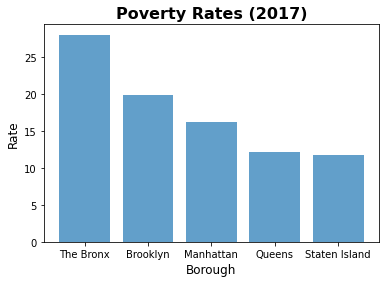

In [39]:
poverty_rate = [28.0, 19.8, 16.2, 12.1, 11.8]
left = range (0, 30)
plt.bar(poverty.Name, poverty_rate, alpha = .7)
plt.title('Poverty Rates (2017)', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.xlabel("Borough", fontdict={'fontsize':'12'})
plt.ylabel("Rate", fontdict={'fontsize':'12'})

plt.show()

In [142]:
housing_cost = pd.read_csv("2017_queens.csv")

In [143]:
housing_cost.head(8000)

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AS OF FINAL ROLL 17/18,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AS OF FINAL ROLL 17/18,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,4,CAMBRIA HEIGHTS,01 ONE FAMILY DWELLINGS,1,12739,19,,A2,117-28 223 STREET,,...,1,0,1,"3,800","1,281",1945,1,A2,"1,000",9/27/17
1,4,GLEN OAKS,01 ONE FAMILY DWELLINGS,1,8543,46,,A2,76-33 267TH STREET,,...,1,0,1,"4,000","1,200",1945,1,A2,"1,000",8/4/17
2,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,1,11101,38,,A1,216-06 106TH AVENUE,,...,1,0,1,"3,537","1,744",1925,1,A1,"1,000",10/23/17
3,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,1,11186,5,,A1,108-13 220TH STREET,,...,1,0,1,"3,185","1,160",1930,1,A1,"1,000",3/20/17
4,4,SO. JAMAICA-BAISLEY PARK,01 ONE FAMILY DWELLINGS,1,11978,12,,A1,114-14 148TH STREET,,...,1,0,1,"2,000",784,1930,1,A1,"1,000",5/29/17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,4,BELLE HARBOR,01 ONE FAMILY DWELLINGS,1,16278,59,,A1,130 BEACH 134 STREET,,...,1,0,1,"4,600","2,664",2016,1,A1,"2,900,000",8/2/17
6284,4,DOUGLASTON,01 ONE FAMILY DWELLINGS,1,8056,62,,A3,126 WEST DRIVE,,...,1,0,1,"22,632","5,071",1901,1,A3,"2,950,000",9/7/17
6285,4,JAMAICA ESTATES,01 ONE FAMILY DWELLINGS,1,9967,60,,A3,184-15 HOVENDEN ROAD,,...,1,0,1,"14,500","5,980",1945,1,A3,"3,475,000",8/21/17
6286,4,DOUGLASTON,01 ONE FAMILY DWELLINGS,1,8018,33,,A3,1 RICHMOND ROAD,,...,1,0,1,"17,700","6,800",1950,1,A3,"4,000,000",5/24/17


In [165]:
housing_cost['SALE PRICE\n'] = housing_cost['SALE PRICE\n'].str.replace(',', '')

housing_cost['SALE PRICE\n']

0          1000
1          1000
2          1000
3          1000
4          1000
         ...   
6283    2900000
6284    2950000
6285    3475000
6286    4000000
6287    5500000
Name: SALE PRICE\n, Length: 6288, dtype: object

In [166]:
housing_cost['SALE PRICE\n'] = housing_cost['SALE PRICE\n'].astype(int)

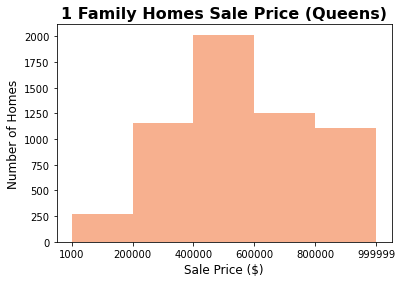

In [291]:
bins = [1000, 200000, 400000, 600000, 800000, 999999] # excluding over $1M homes
plt.hist(housing_cost['SALE PRICE\n'], bins = bins, color ='#f59c73', alpha =.8)

plt.xticks(bins)
plt.xlabel("Sale Price ($)", fontdict={'fontsize':'12'})
plt.ylabel("Number of Homes", fontdict={'fontsize':'12'})
plt.title('1 Family Homes Sale Price (Queens)', fontdict={'fontweight':'bold', 'fontsize': 16})


plt.show()


In [279]:
housing_cost['GROSS SQUARE FEET\n'] = housing_cost['GROSS SQUARE FEET\n'].str.replace(',', '')


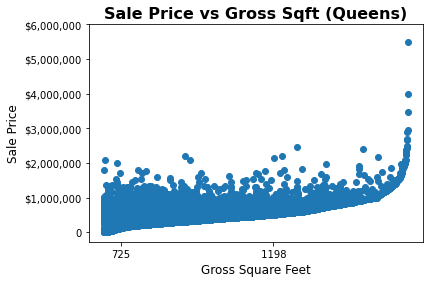

In [293]:
plt.scatter(housing_cost['GROSS SQUARE FEET\n'],housing_cost['SALE PRICE\n'])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000], ['0', '$1,000,000', '$2,000,000', '$3,000,000', '$4,000,000', '$5,000,000','$6,000,000'])

plt.xticks([100, 1000])

plt.xlabel("Gross Square Feet", fontdict={'fontsize':'12'})
plt.ylabel("Sale Price", fontdict={'fontsize':'12'})
plt.title('Sale Price vs Gross Sqft (Queens)', fontdict={'fontweight':'bold', 'fontsize': 16})



plt.show()

Text(0.5, 1.0, 'Sale Price vs Gross Sqft (Queens)')

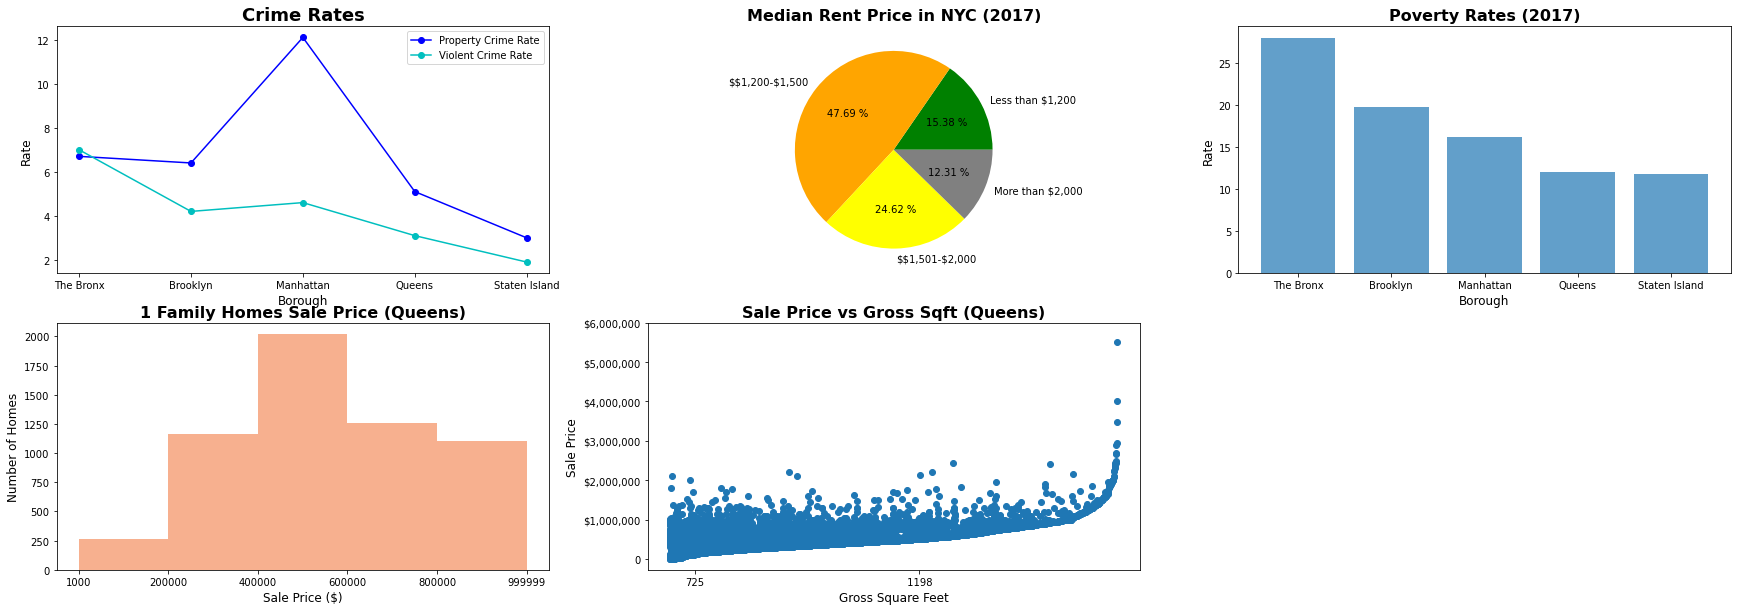

In [381]:
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(2, 3, 1)
line1 = plt.plot(crime['Name'], crime['property_crime_rate'], color ='b', marker = 'o')
line2 = plt.plot(crime['Name'], crime['violent_crime_rate'], color = 'c', marker = 'o')
plt.legend(['Property Crime Rate', 'Violent Crime Rate'], loc = 0)
ax = plt.gca()
ax.set_title("Crime Rates", fontdict={'fontweight':'bold', 'fontsize': 18})
plt.xlabel("Borough", fontdict={'fontsize':'12'})
plt.ylabel("Rate", fontdict={'fontsize':'12'})

ax2 = fig.add_subplot(2, 3, 2)
rent_price = [less_than_1200, range_1200_to_1500, range_1501_to_2000, more_than_2000]
plt.pie(rent_price, labels=labels, autopct = '%.2f %%', colors = colors)
plt.title('Median Rent Price in NYC (2017)', fontdict={'fontweight':'bold', 'fontsize': 16})

ax3 = fig.add_subplot(2, 3, 3)
plt.bar(poverty.Name, poverty_rate, alpha = .7)
plt.title('Poverty Rates (2017)', fontdict={'fontweight':'bold', 'fontsize': 16})
plt.xlabel("Borough", fontdict={'fontsize':'12'})
plt.ylabel("Rate", fontdict={'fontsize':'12'})


ax4 = fig.add_subplot(2, 3, 4)
bins = [1000, 200000, 400000, 600000, 800000, 999999] # excluding over $1M homes
plt.hist(housing_cost['SALE PRICE\n'], bins = bins, color ='#f59c73', alpha =.8)
plt.xticks(bins)
plt.xlabel("Sale Price ($)", fontdict={'fontsize':'12'})
plt.ylabel("Number of Homes", fontdict={'fontsize':'12'})
plt.title('1 Family Homes Sale Price (Queens)', fontdict={'fontweight':'bold', 'fontsize': 16})

ax5 = fig.add_subplot(2, 3, 5)
plt.scatter(housing_cost['GROSS SQUARE FEET\n'],housing_cost['SALE PRICE\n'])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000], ['0', '$1,000,000', '$2,000,000', '$3,000,000', '$4,000,000', '$5,000,000','$6,000,000'])
plt.xticks([100, 1000])
plt.xlabel("Gross Square Feet", fontdict={'fontsize':'12'})
plt.ylabel("Sale Price", fontdict={'fontsize':'12'})
plt.title('Sale Price vs Gross Sqft (Queens)', fontdict={'fontweight':'bold', 'fontsize': 16})